
# Project: Investigate a Dataset (Investigate a Dataset (TMDb))



<a id='intro'></a>
## Introduction

watching movies is a large portion of entertainment industry , having a lot of fun , what about  the economy of the . I am interested in watching movies , it's one of my pleasuring fun and I wait for all new movies to be shown  , so I wanna know more about the insutry and which movies have the most effect. Here we have a dataset to investigate "TMDb Movie Database" a dataset of about 5000 movies:





##     i need to ask these questions 
 
    ● Is there a relation between the budget and the revenue ?
    ● which genre made more money ?
    ● which copmany has the biggest Market share in each year?
    ● What rate of drama movie production over years ?
    ● what are the most popular genres ?
    ● what are the charecteristics of a great movie?


In [168]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline



In [67]:
from ast import literal_eval

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [68]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
mov_df = pd.read_csv('tmdb_5000_movies.csv')
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [69]:
mov_df.describe()
#revenue column has 25% of its values equal to zero.

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### budget and revenue has a lot of zero values.

(1427, 20)

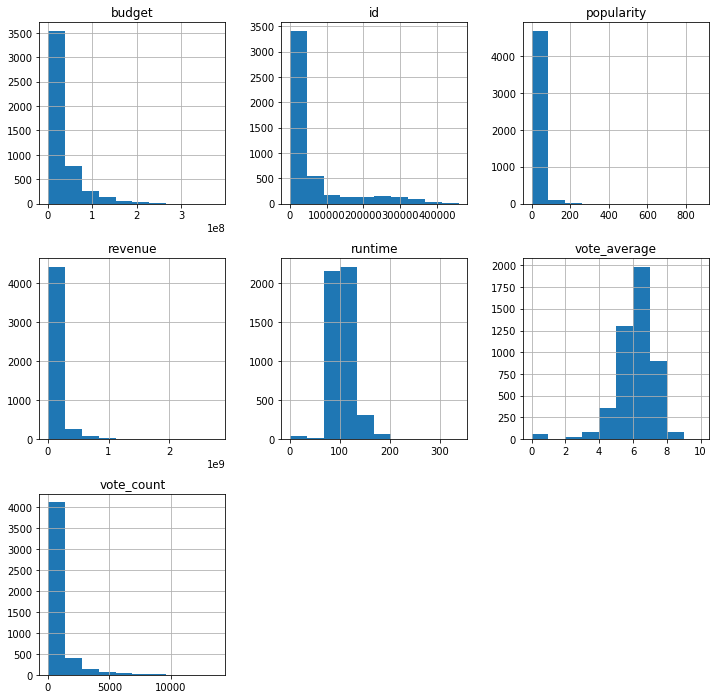

In [70]:
mov_df.hist(figsize=(12,12))

# budget and revenue has alot of zeros .
s = mov_df[mov_df.revenue == 0]
s.shape

# Data cleaning

In [71]:
mov_df.isnull().any()
# homepage,overview,release_date and tagline has Null values.


budget                  False
genres                  False
homepage                 True
id                      False
keywords                False
original_language       False
original_title          False
overview                 True
popularity              False
production_companies    False
production_countries    False
release_date             True
revenue                 False
runtime                  True
spoken_languages        False
status                  False
tagline                  True
title                   False
vote_average            False
vote_count              False
dtype: bool

#### ... we will not drop null values until selecting our prefered columns.


In [72]:
mov_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [73]:
# we will ignore columns that has no added value 
filtered_mov=mov_df[['budget', 'genres','original_language', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime', 'title', 'vote_average',
       'vote_count']]
filtered_mov.isnull().any()

budget                  False
genres                  False
original_language       False
popularity              False
production_companies    False
production_countries    False
release_date             True
revenue                 False
runtime                  True
title                   False
vote_average            False
vote_count              False
dtype: bool

In [74]:
#then we drop null values in selected df
filtered_mov_1=filtered_mov.dropna()
filtered_mov_1.isnull().any()
filtered_mov_1.head(2)

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500


In [75]:
#column release_date has a string value 
type(filtered_mov_1['release_date'][0])


str

In [76]:
#we have to change to date data type 
mov_copy = filtered_mov_1.copy()
mov_copy['release_date']=pd.to_datetime(mov_copy['release_date'])
#chcek release_date data type
mov_copy.dtypes

budget                           int64
genres                          object
original_language               object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

##### ● genres , production_companies , production_countries has list of dicts.
####  ● we can extract first single value


In [77]:
# we need to transform dicts to single values
mov_copy['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [78]:
#extract dicts  to list items 
mov_copy['genres'] =mov_copy['genres'].apply(literal_eval)
mov_copy['production_companies'] =mov_copy['production_companies'].apply(literal_eval)
mov_copy['production_countries'] =mov_copy['production_countries'].apply(literal_eval)


In [79]:
#Now column type is list not str
type(mov_copy['genres'][0])
len(mov_copy)
len(mov_copy['genres'][34])


2

In [80]:
def getTopGeneres(column):
        #return first  genere ,country or language of a movie
        names = [row['name'] for row in column]
        names = names[0:1]
        return names

def listItemToString(st):  
    #return string of a list item .
    string = " "  
    return (string.join(st))  



#genres column
mov_copy['genres']=mov_copy['genres'].apply(getTopGeneres)
mov_copy['genres']=mov_copy['genres'].apply(listItemToString)

#production_companies
mov_copy['production_companies']=mov_copy['production_companies'].apply(getTopGeneres)
mov_copy['production_companies']=mov_copy['production_companies'].apply(listItemToString)

#production_countries
mov_copy['production_countries']=mov_copy['production_countries'].apply(getTopGeneres)
mov_copy['production_countries']=mov_copy['production_countries'].apply(listItemToString)



mov_copy.head()

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,Action,en,150.437577,Ingenious Film Partners,United States of America,2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,Adventure,en,139.082615,Walt Disney Pictures,United States of America,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,Action,en,107.376788,Columbia Pictures,United Kingdom,2015-10-26,880674609,148.0,Spectre,6.3,4466
3,250000000,Action,en,112.312950,Legendary Pictures,United States of America,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106
4,260000000,Action,en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,John Carter,6.1,2124


In [81]:
mov_copy['budget'].mean()

29060068.024791665

In [82]:
len(mov_copy[mov_copy['budget']  < 1000])

1067

In [83]:
mov_copy.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.800000e+03,4800.000000,4.800000e+03,4800.000000,4800.000000,4800.000000
mean,2.906007e+07,21.505569,8.231205e+07,106.898125,6.094458,690.646875
std,4.073029e+07,31.822163,1.628950e+08,22.561593,1.188366,1234.852449
min,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,4.682212,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.928897,1.918199e+07,103.000000,6.200000,236.000000
75%,4.000000e+07,28.350628,9.293886e+07,118.000000,6.800000,737.250000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


#### mov_copy has outliers in budget , vote_count and revenue so we have to deal with 
#### we detect outliers and remove .

In [84]:
mov_copy=mov_copy[(mov_copy['budget']> 800000) & (mov_copy['vote_count']> 54) & (mov_copy['revenue']> 1.9)]

In [85]:
mov_copy.describe()
mov_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867 entries, 0 to 4758
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                2867 non-null   int64         
 1   genres                2867 non-null   object        
 2   original_language     2867 non-null   object        
 3   popularity            2867 non-null   float64       
 4   production_companies  2867 non-null   object        
 5   production_countries  2867 non-null   object        
 6   release_date          2867 non-null   datetime64[ns]
 7   revenue               2867 non-null   int64         
 8   runtime               2867 non-null   float64       
 9   title                 2867 non-null   object        
 10  vote_average          2867 non-null   float64       
 11  vote_count            2867 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 291.2+ K

In [86]:
mov_copy[mov_copy['revenue'] == mov_copy['revenue'].max()]

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,Action,en,150.437577,Ingenious Film Partners,United States of America,2009-12-10,2787965087,162.0,Avatar,7.2,11800


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Is there a relation between the budget and the revenue ?


<Figure size 1440x1440 with 0 Axes>

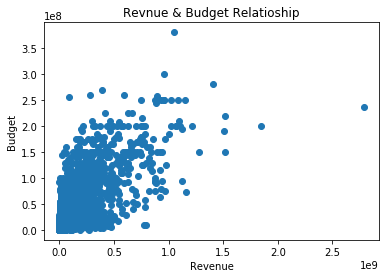

<Figure size 1440x1440 with 0 Axes>

In [87]:
plt.scatter(mov_copy.revenue, mov_copy.budget)
plt.xlabel('Revenue')
plt.ylabel('Budget')
plt.title('Revnue & Budget Relatioship')
plt.figure(figsize=(20, 20))

###  ● we notice there is a positive relation between budget and revenue

### Research Question 2: which genre made more money ?

Text(0, 0.5, 'revenue')

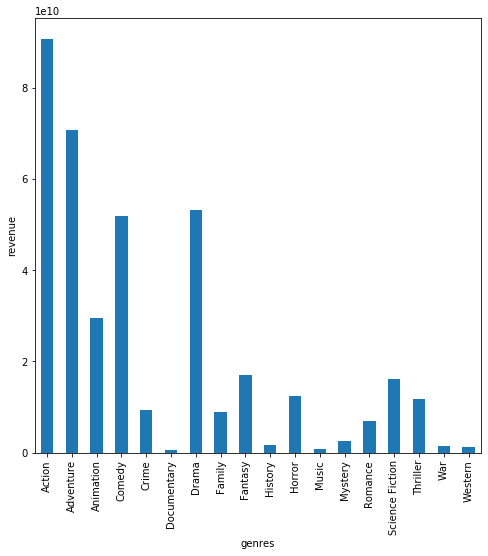

In [88]:
#extract total revenue per genre.
genres_sum =mov_copy.groupby('genres').revenue.sum()
plt = genres_sum.plot(kind ='bar',figsize =(8,8))

plt.set_xlabel("genres")
plt.set_ylabel("revenue")

### ● we see that Action and Adventure made more money than others.

### Research Question 3: which copmany has the biggest Market share  in each year?

In [89]:
mov_copy.tail()

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
4535,2000000,Action,ja,39.756748,Toho Company,Japan,1954-04-26,271841,207.0,Seven Samurai,8.2,878
4586,35000000,Comedy,da,38.100488,Twentieth Century Fox Film Corporation,United States of America,2008-05-07,170000000,99.0,What Happens in Vegas,5.8,923
4596,6000000,Horror,en,19.331884,La Petite Reine,France,2012-12-26,31081,89.0,Maniac,6.0,316
4720,8500000,Drama,en,9.452808,Phantom Four,United States of America,2016-09-09,15861566,120.0,The Birth of a Nation,6.5,178
4758,4000000,Thriller,en,27.662696,Automatik Entertainment,United States of America,2014-03-15,600896,95.0,The Signal,5.8,631


In [90]:
#extract year from date time.
mov_copy['release_date'] = mov_copy['release_date'].dt.year

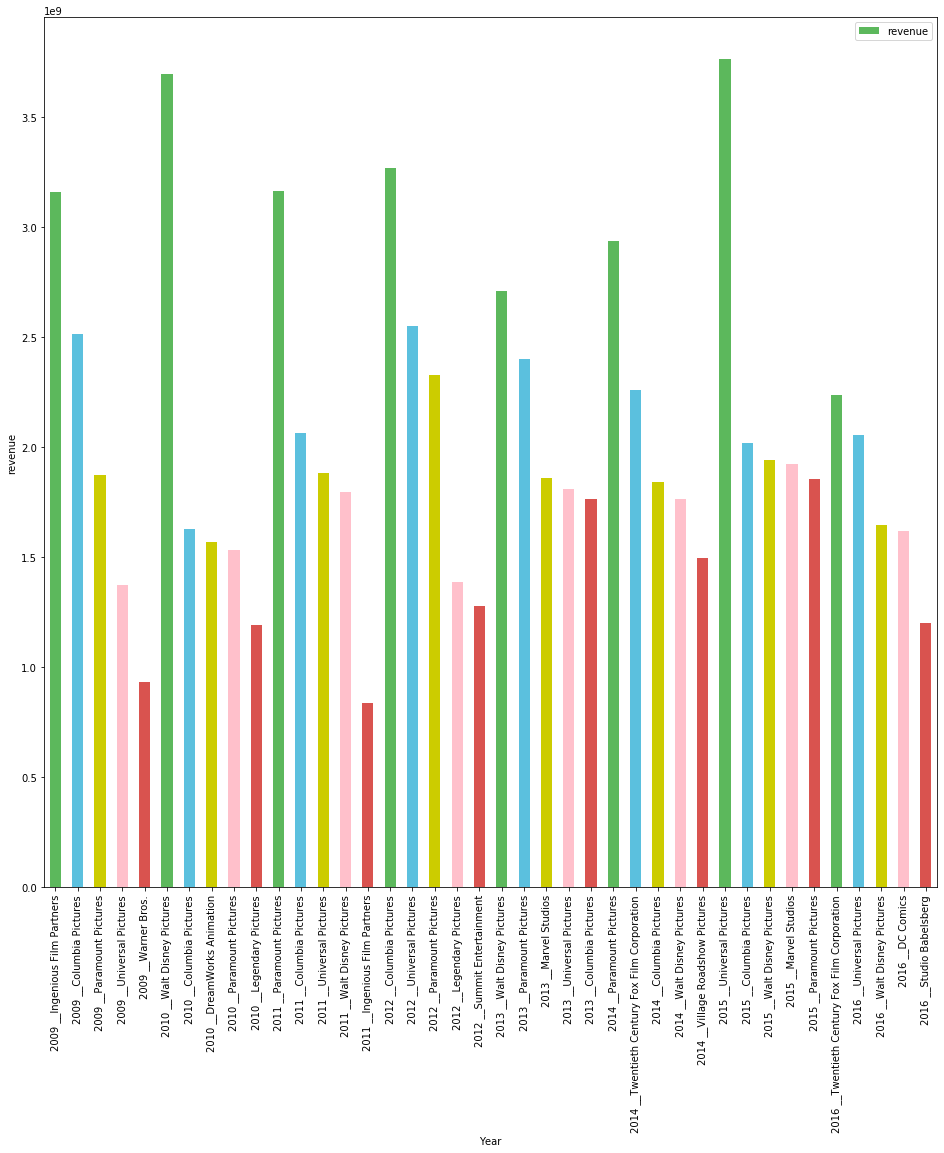

In [91]:
#each year companies.
each_year_companies = mov_copy.groupby(['release_date' ,'production_companies'])['revenue'].sum()
#create data frame .
df = pd.DataFrame(each_year_companies).reset_index()
df.columns = ['year', 'production_company','revenue']
type(df)
#get first 5 companies with high revenue in each year.
df= df.sort_values(['year','revenue'],ascending=[True, False])
df1 =df.groupby('year').head(5)


#plot year with revenue and the highest companies by revenue.
ax = df1.tail(40).plot.bar(x='year',y='revenue',figsize=(16,16),width=0.5,color=['#5cb85c','#5bc0de','#CCCC00','#FFC0CB','#d9534f'])
ax.set_xlabel("Year")
ax.set_ylabel("revenue")
a = ax.set_xticklabels(list(df1.tail(40)['year'].apply(str)+ " __"+ df1.tail(40)['production_company']))





### ● we conclude  that Twentieth Century Fox Film Corporation has the biggest  revenue share at 2016 and universal pictures doing very well in 2015 (bar with green color)

### Research Question 4: What rate of drama movie production over years ?

Text(0, 0.5, 'revenue')

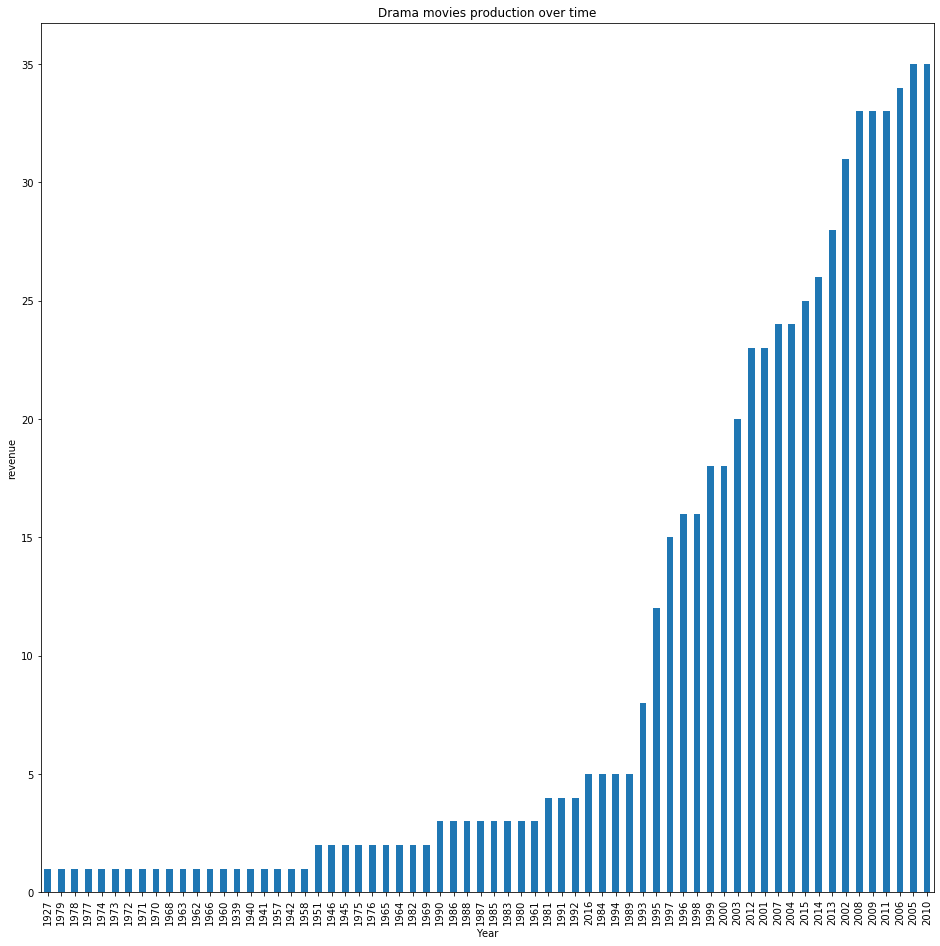

In [92]:
drama_movies = mov_copy.query('genres == "Drama"')['release_date'].value_counts(ascending=True)
ax=drama_movies.plot(kind = 'bar',figsize=(16,16),title='Drama movies production over time')
ax.set_xlabel("Year")
ax.set_ylabel("revenue")


### ● we conclude  that  Drama movies production inflated over time

### Research Question 5 :what are the most popular genres ?¶


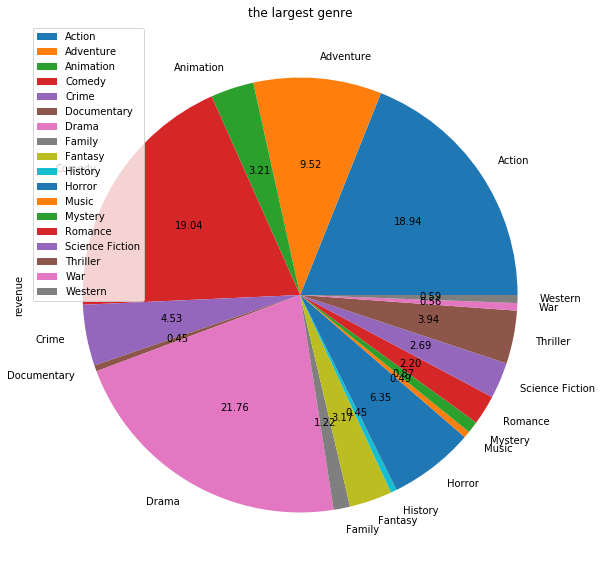

In [93]:
mov_copy.groupby(['genres']).count().plot.pie(y='revenue',figsize=(10,10),autopct="%.2f",
                                                      title='the largest genre')

### ● we conclude  that  Drama ,comedy and action have the biggest maeket share


### Research Question 6 :   what are the charecteristics of a great movie?¶


##### Extract greater than  75% of revenue movies and 75% of avreage votes .


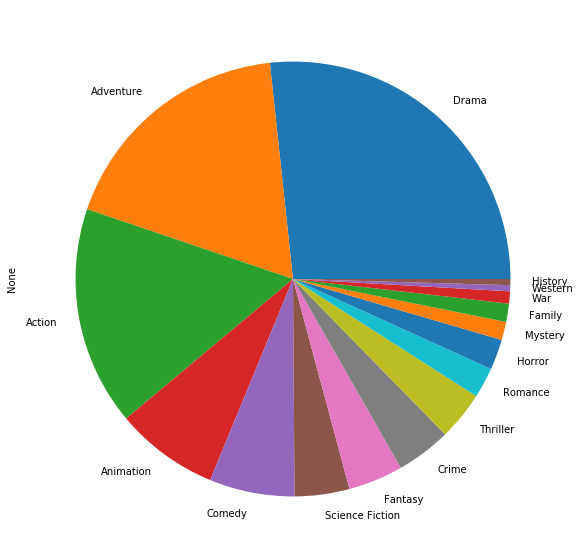

In [184]:
# extract above 75% of revenue movies.

revenue_quantile= mov_copy.revenue.quantile(0.75)
vote_quantile = mov_copy.vote_average.quantile(0.75)
#movies with heigher revenue and votes.
great_movies =mov_copy[(mov_copy['revenue'] > revenue_quantile ) & (mov_copy['vote_average'] > vote_quantile)]
great_movies.head(30)
#great_movies.original_language.value_counts()
great_movies_genre =great_movies.groupby('genres').size().sort_values(ascending=False)
great_movies_genre.plot(kind='pie',figsize=(10,10))

In [185]:
#average run time of a great movie
great_movies.runtime.mean()

129.45248868778282

In [186]:
#average budget of a great movie
great_movies.budget.mean()

82130894.56561086

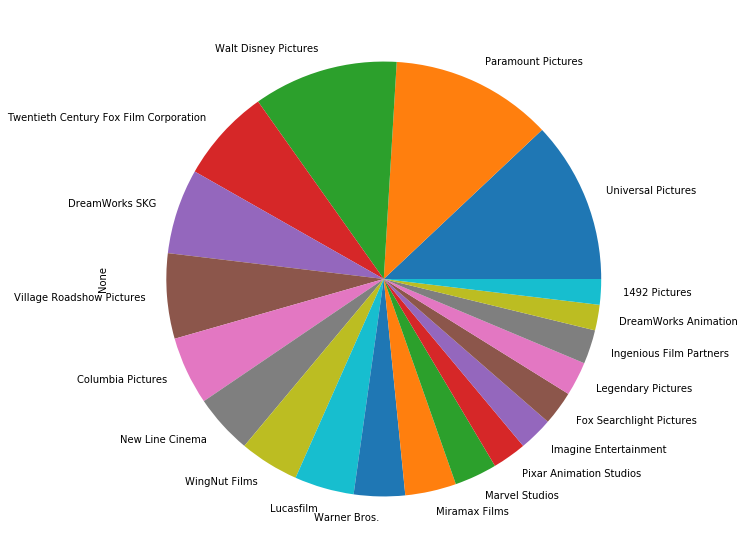

In [191]:
great_movies_company =great_movies.groupby('production_companies').size().sort_values(ascending=False)
great_movies_company.head(20).plot(kind='pie',figsize=(10,10))

### ● we conclude  that  IF you wanna make a great movie you should have a bugdet around 80 M USD  and write script in drama ,avendure and action then go to universal pictures or paramnount to produce the               movie.


<a id='conclusions'></a>
## Conclusions



###### * Is there a relation between the budget and the revenue ?

######   ●____ ● there is a positive relation between budget and revenue

##### * which genre made more money ?

######   ●____ ● we see that Action and Adventure made more money than others.

##### *which copmany has the biggest Market share in each year?


######  ●____ ● we conclude that Twentieth Century Fox Film Corporation has the biggest revenue share at 2016 and universal pictures doing very well in 2015 (bar with green color)

##### *What rate of drama movie production over years ?

######   ●____ ●  Drama movies production inflated over time


##### *what are the most popular genres ?

#### ●____ ●  we conclude  that  Drama ,comedy and action have the biggest maeket share

##### *what are the charecteristics of a great movie?

 #### ●____ ●  we conclude  that  IF you wanna make a great movie you should have a bugdet around 80 M USD  and write script in drama ,avendure and action then go to universal pictures or paramnount to produce the               movie.

## Limitations:¶


####  1- The dataset doesn't have suffeiceint variables that we would need in our analysis like director or movie main actor . 
####  2-the dataset revenue and budget doesn't offer of what type of currency the movies were ?
####  3-The number of observations in the dataset is not suffeiceint to make a sophisticated analysis as number of rows after cleaning were too small.